# Loading the required libraries


In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Loading the dataset

In [49]:
data = pd.read_csv('Employee.csv')
data.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2.0,...,0.0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3.0,...,3.0,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0.0,...,3.0,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1.0,...,2.0,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0.0,...,0.0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [50]:
# Shape of data
data.shape

(74498, 24)

In [51]:
# Basic information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Employee ID               74498 non-null  int64  
 1   Age                       74498 non-null  int64  
 2   Gender                    74498 non-null  object 
 3   Years at Company          74498 non-null  int64  
 4   Job Role                  74498 non-null  object 
 5   Monthly Income            74498 non-null  int64  
 6   Work-Life Balance         74494 non-null  object 
 7   Job Satisfaction          74498 non-null  object 
 8   Performance Rating        74494 non-null  object 
 9   Number of Promotions      74493 non-null  float64
 10  Overtime                  74498 non-null  object 
 11  Distance from Home        74498 non-null  int64  
 12  Education Level           74493 non-null  object 
 13  Marital Status            74494 non-null  object 
 14  Number

In [52]:
#Statistical Analysis
data.describe()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,74498.000000,74498.000000,74498.000000,74498.000000,74493.000000,74498.000000,74492.000000,74498.000000
mean,37249.500000,38.529746,15.721603,7299.379514,0.832978,49.991584,1.650365,55.727456
std,21505.864514,12.083456,11.223744,2152.508566,0.995303,28.513611,1.553660,25.399349
min,1.000000,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,18625.250000,28.000000,7.000000,5652.000000,0.000000,25.000000,0.000000,36.000000
50%,37249.500000,39.000000,13.000000,7348.000000,1.000000,50.000000,1.000000,56.000000
75%,55873.750000,49.000000,23.000000,8876.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,16149.000000,4.000000,99.000000,6.000000,128.000000


In [53]:
#Check for null values
data.isna().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           4
Job Satisfaction            0
Performance Rating          4
Number of Promotions        5
Overtime                    0
Distance from Home          0
Education Level             5
Marital Status              4
Number of Dependents        6
Job Level                   5
Company Size                2
Company Tenure              0
Remote Work                 3
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        2
Attrition                   0
dtype: int64

# Data Preprocessing

In [54]:
### Handling Missing values

In [55]:
data[data.duplicated()]

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition


In [56]:
#Using imputation method
Work_Life_Balance_mode = data['Work-Life Balance'].mode().iloc[0]
Performance_Rating_mode = data['Performance Rating'].mode().iloc[0]

Number_of_Promotions_mean = data['Number of Promotions'].mean()
Education_Level_mode = data['Education Level'].mode().iloc[0]
Marital_Status_mode = data['Marital Status'].mode().iloc[0]
Number_of_Dependents_mean = data['Number of Dependents'].mean()
Job_Level_mode = data['Job Level'].mode().iloc[0]
Company_Size_mode = data['Company Size'].mode().iloc[0]
Remote_Work_mode = data['Remote Work'].mode().iloc[0]
Employee_Recognition_mode = data['Employee Recognition'].mode().iloc[0]


## fill the missing values

data['Work-Life Balance'] = data['Work-Life Balance'].fillna(Work_Life_Balance_mode)
data['Performance Rating'] = data['Performance Rating'].fillna(Performance_Rating_mode)
data['Number of Promotions'] = data['Number of Promotions'].fillna(Number_of_Promotions_mean)
data['Education Level'] = data['Education Level'].fillna(Education_Level_mode)
data['Marital Status'] = data['Marital Status'].fillna(Marital_Status_mode)
data['Number of Dependents'] = data['Number of Dependents'].fillna(Number_of_Dependents_mean)
data['Job Level'] = data['Job Level'].fillna(Job_Level_mode)
data['Company Size'] = data['Company Size'].fillna(Company_Size_mode)
data['Remote Work'] = data['Remote Work'].fillna(Remote_Work_mode)
data['Employee Recognition'] = data['Employee Recognition'].fillna(Employee_Recognition_mode)



data



,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2.0,...,0.0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3.0,...,3.0,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0.0,...,3.0,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1.0,...,2.0,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0.0,...,0.0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74493,16243,56,Female,42,Healthcare,7830,Poor,Medium,Average,0.0,...,0.0,Senior,Medium,60,No,No,No,Poor,Medium,Stayed
74494,47175,30,Female,15,Education,3856,Good,Medium,Average,2.0,...,0.0,Entry,Medium,20,No,No,No,Good,Medium,Left
74495,12409,52,Male,5,Education,5654,Good,Very High,Below Average,0.0,...,4.0,Mid,Small,7,No,No,No,Good,High,Left
74496,9554,18,Male,4,Education,5276,Fair,High,Average,0.0,...,3.0,Mid,Large,5,No,No,No,Poor,High,Stayed


In [57]:
data.isna().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

#EDA(Exploratory Data Analysis)

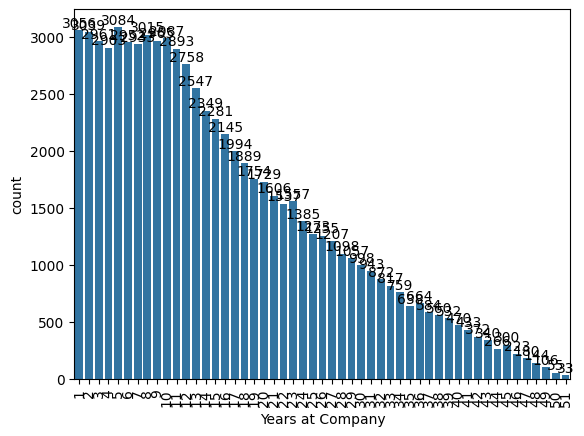

In [58]:
# no of years from the data

ax = sns.countplot(x = data["Years at Company"].sort_values())
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 90)
plt.show()

In [59]:
data['Attrition'].value_counts()

Attrition
Stayed    39128
Left      35370
Name: count, dtype: int64

In [60]:
#adding result column

data["Result"] = 0

result = []

for i in data["Attrition"]:
    if i == "Stayed":
        result.append(1)
    else:
        result.append(0)

In [61]:
data[data["Attrition"]=="Stayed"].shape

(39128, 25)

In [62]:
data["Result"] = result
print(data["Result"].value_counts())

Result
1    39128
0    35370
Name: count, dtype: int64


In [63]:
stayed = data[data["Attrition"] == "Stayed"]
stayed

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition,Result
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2.0,...,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed,1
1,64756,59,Female,4,Media,5534,Poor,High,Low,3.0,...,Mid,Medium,21,No,No,No,Fair,Low,Stayed,1
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0.0,...,Mid,Medium,74,No,No,No,Poor,Low,Stayed,1
3,65791,36,Female,7,Education,3989,Good,High,High,1.0,...,Mid,Small,50,Yes,No,No,Good,Medium,Stayed,1
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0.0,...,Senior,Medium,68,No,No,No,Fair,Medium,Stayed,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74490,16169,47,Male,13,Education,4024,Fair,Low,Below Average,2.0,...,Mid,Large,24,Yes,No,Yes,Good,Medium,Stayed,1
74491,6323,34,Male,25,Media,6717,Good,High,High,1.0,...,Mid,Large,98,No,No,No,Good,Medium,Stayed,1
74492,68796,52,Male,13,Technology,9296,Poor,High,Average,1.0,...,Entry,Small,55,No,Yes,No,Poor,Low,Stayed,1
74493,16243,56,Female,42,Healthcare,7830,Poor,Medium,Average,0.0,...,Senior,Medium,60,No,No,No,Poor,Medium,Stayed,1


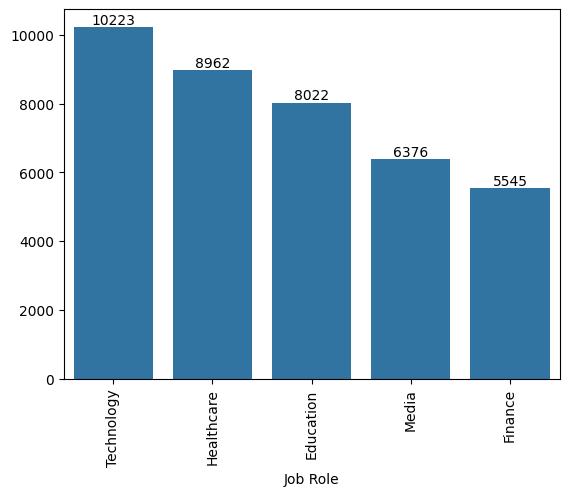

In [64]:
# count of workers from different sectors (stayed workers)
ax = sns.barplot(y = stayed["Job Role"].value_counts().values, x = stayed["Job Role"].value_counts().index)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.show()

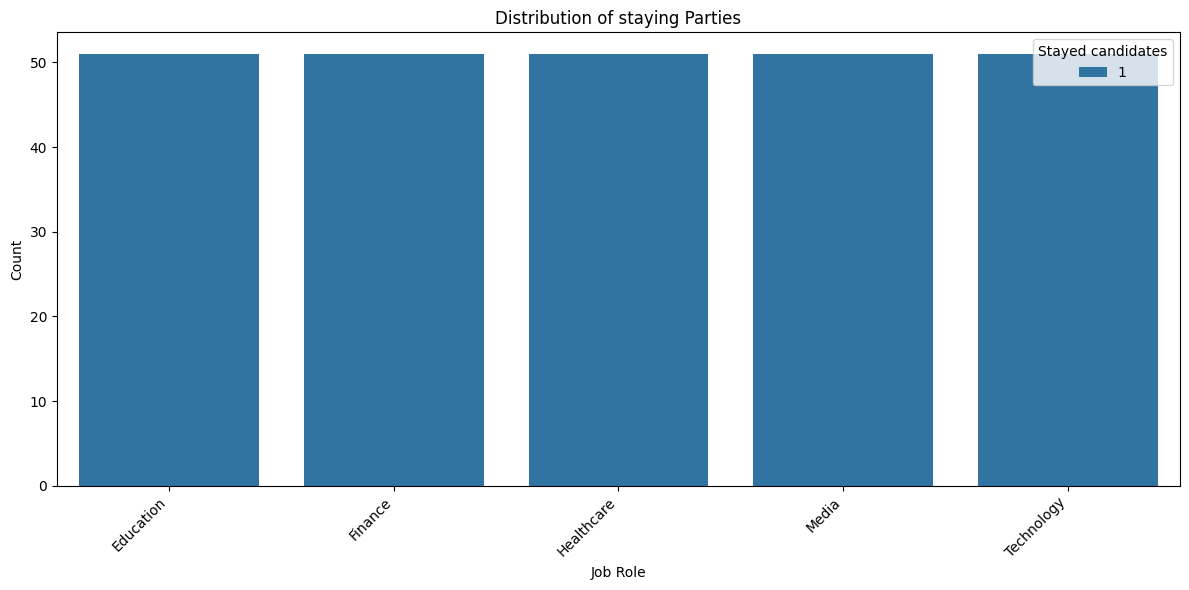

In [65]:
# Identify thestaying candidate
staying_candidates = data.loc[data.groupby(['Years at Company', 'Job Role'])['Result'].idxmax()]

# Create a count plot to visualize the distribution of winning parties
plt.figure(figsize=(12, 6))
sns.countplot(x='Job Role', hue='Result', data=staying_candidates)
plt.title('Distribution of staying Parties')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Stayed candidates')
plt.tight_layout()
plt.show()

Kruskal-Wallis Test: Statistic = 14.77747379680396, p-value = 0.005185718170064674


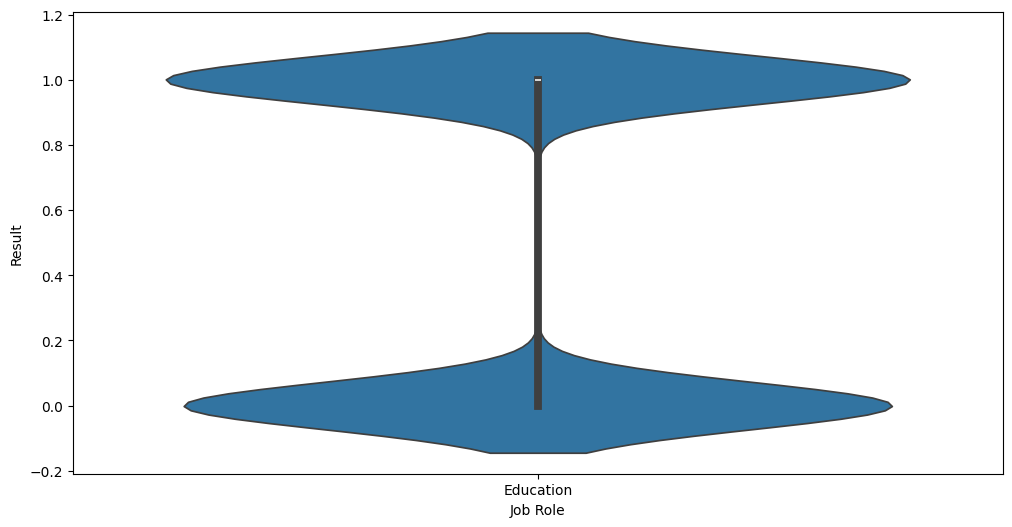

In [66]:
# violin plot for understanding the relation ships btw " Job Role and Result"


#  A higher value in Kruskal-Wallis Test indicates more significant difference.
#  there are systematic variations in the staying results associated with different job roles.

from scipy.stats import kruskal

job_education = data[data["Job Role"] == "Education"]


plt.figure(figsize=(12,6))
sns.violinplot(data=job_education, y="Result", x = "Job Role")



# Perform Kruskal-Wallis test
result_by_job_education= [data['Result'][data['Job Role'] == job_role] for job_role in data['Job Role'].unique()]
kruskal_stat, p_value = kruskal(*result_by_job_education)

# Print the test result
print(f"Kruskal-Wallis Test: Statistic = {kruskal_stat}, p-value = {p_value}")

In [67]:
data.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size', 'Company Tenure',
       'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition', 'Result'],
      dtype='object')

In [68]:
columns = [
    'Age',
    'Years at Company',
    'Monthly Income',
    'Number of Promotions',
    'Distance from Home',
    'Number of Dependents',
    'Company Tenure',
    'Result'
]
data_selected = data[columns]

In [69]:
#Correlation Matrix
corr_matrix = data_selected.corr()
corr_matrix

,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure,Result
Age,1.000000,0.537318,-0.001750,0.000655,-0.004586,0.003650,0.236337,0.050801
Years at Company,0.537318,1.000000,-0.005971,0.000942,-0.004835,0.004393,0.442580,0.065388
Monthly Income,-0.001750,-0.005971,1.000000,0.005690,-0.001910,0.001465,-0.006911,0.010687
Number of Promotions,0.000655,0.000942,0.005690,1.000000,-0.006869,-0.001452,0.005149,0.081158
Distance from Home,-0.004586,-0.004835,-0.001910,-0.006869,1.000000,-0.000985,-0.005735,-0.093836
Number of Dependents,0.003650,0.004393,0.001465,-0.001452,-0.000985,1.000000,0.000433,0.074581
Company Tenure,0.236337,0.442580,-0.006911,0.005149,-0.005735,0.000433,1.000000,0.028964
Result,0.050801,0.065388,0.010687,0.081158,-0.093836,0.074581,0.028964,1.000000


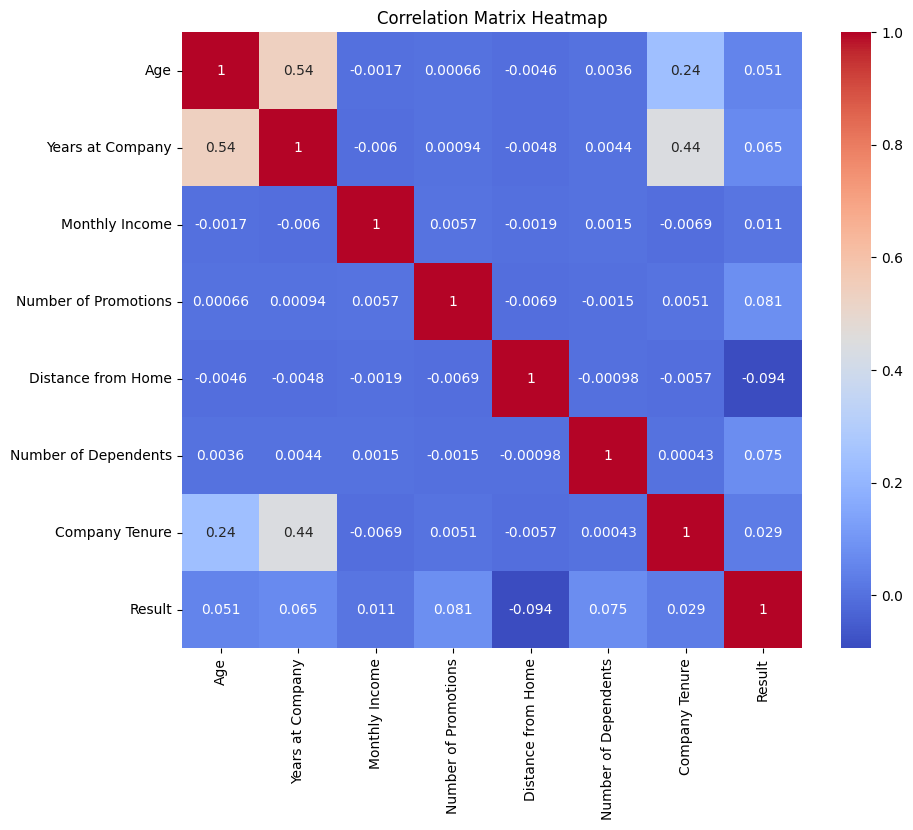

In [70]:
#Heatmap of Correlation Matrix:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

#ENCODING

In [71]:
features = data[["Gender","Job Role","Job Level","Company Size","Innovation Opportunities","Company Reputation","Result"]]

In [72]:
encode_values = features.copy()
# label encoding

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [73]:
# will be using for encoding new candidate prediction
prediction_values = encode_values.copy()


# downloading prediction_values as csv file for flask
prediction_values.to_csv("/content/prediction_values.csv")

In [80]:
Gender = encoder.fit_transform(encode_values["Gender"])
encode_values["Gender"] = Gender

In [81]:
encode_values = features.copy()

In [86]:
encode_values["Gender"] = encoder.fit_transform(encode_values["Gender"])

encode_values["Job Role"] = encoder.fit_transform(encode_values["Job Role"])


encode_values["Job Level"] = encoder.fit_transform(encode_values["Job Level"])

encode_values["Company Size"] = encoder.fit_transform(encode_values["Company Size"])

encode_values["Innovation Opportunities"] = encoder.fit_transform(encode_values["Innovation Opportunities"])
encode_values["Company Reputation"] = encoder.fit_transform(encode_values["Company Reputation"])


In [87]:
encode_values

,Gender,Job Role,Job Level,Company Size,Innovation Opportunities,Company Reputation,Result
0,1,0,1,1,0,0,1
1,0,3,1,1,0,1,1
2,0,2,1,1,0,3,1
3,0,0,1,2,0,2,1
4,1,0,2,1,0,1,1
...,...,...,...,...,...,...,...
74493,0,2,2,1,0,3,1
74494,0,0,0,1,0,2,0
74495,1,0,1,2,0,2,0
74496,1,0,1,0,0,3,1


# SCALING

In [84]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [88]:
x = encode_values.drop(columns="Result")
y = encode_values["Result"]
#y = y.reshape(-1,1)
x1 = x.copy()

x = scaler.fit_transform(x)
#y = scaler.fit_transform(y)

In [89]:
##splitting
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=True)

# Modelling

In [90]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)
rf_predict = rf_model.predict(x_test)
# evaluation

from sklearn.metrics import accuracy_score, classification_report

print("Accuracy: ",  accuracy_score(rf_predict,y_test))
print("\n Claaification report: \n", classification_report(rf_predict,y_test))

Accuracy:  0.6335570469798658

 Claaification report: 
               precision    recall  f1-score   support

           0       0.65      0.60      0.63      7573
           1       0.62      0.66      0.64      7327

    accuracy                           0.63     14900
   macro avg       0.63      0.63      0.63     14900
weighted avg       0.63      0.63      0.63     14900



In [91]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=300,
                                 learning_rate=0.05,
                                 random_state=100,
                                 max_features=5 )
gbc.fit(x_train,y_train)
gbc_predict = gbc.predict(x_test)
# evaluation

from sklearn.metrics import accuracy_score, classification_report

print("Accuracy: ",  accuracy_score(gbc_predict,y_test))
print("\n Claaification report: \n", classification_report(gbc_predict,y_test))

Accuracy:  0.6388590604026846

 Claaification report: 
               precision    recall  f1-score   support

           0       0.64      0.61      0.62      7308
           1       0.64      0.66      0.65      7592

    accuracy                           0.64     14900
   macro avg       0.64      0.64      0.64     14900
weighted avg       0.64      0.64      0.64     14900



In [92]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()
knn_model.fit(x_train,y_train)
knn_model_predict = knn_model.predict(x_test)
# evaluation

from sklearn.metrics import accuracy_score, classification_report

print("Accuracy: ",  accuracy_score(knn_model_predict,y_test))
print("\n Claaification report: \n", classification_report(knn_model_predict,y_test))

Accuracy:  0.5957046979865772

 Claaification report: 
               precision    recall  f1-score   support

           0       0.60      0.57      0.58      7375
           1       0.60      0.62      0.61      7525

    accuracy                           0.60     14900
   macro avg       0.60      0.60      0.60     14900
weighted avg       0.60      0.60      0.60     14900



In [ ]:
from sklearn.svm import SVC
svc_model=SVC()
svc_model.fit(x_train,y_train)
svc_model_predict = svc_model.predict(x_test)
# evaluation

from sklearn.metrics import accuracy_score, classification_report

print("Accuracy: ",  accuracy_score(svc_model_predict,y_test))
print("\n Claaification report: \n", classification_report(svc_model_predict,y_test))

In [ ]:
data.loc[37]

In [ ]:
# prediction  1

candidate_prediction = {
    "Gender": "Male",
    "Job Role": "Healthcare",
    "Company Size": "Medium",
    "Innovation Opportunities": "No",
    "Company Reputation": "Poor",

}


candidate_predictdf = pd.DataFrame([candidate_prediction])


encoder.fit_transform(prediction_values["Gender"])
candidate_predictdf['Gender'] = encoder.transform(candidate_predictdf['Gender'])


encoder.fit_transform(prediction_values["Job Role"])
candidate_predictdf['Job Role'] = encoder.transform(candidate_predictdf['Job Role'])

encoder.fit_transform(prediction_values["Company Size"])
candidate_predictdf['Company Size'] = encoder.transform(candidate_predictdf['Company Size'])

encoder.fit_transform(prediction_values["Innovation Opportunities"])
candidate_predictdf['Innovation Opportunities'] = encoder.transform(candidate_predictdf['Innovation Opportunities'])


encoder.fit_transform(prediction_values["Company Reputation"])
candidate_predictdf['Company Reputation'] = encoder.transform(candidate_predictdf['Company Reputation'])




scaler.fit_transform(x1)
candidate_predict_scaled = scaler.transform(candidate_predictdf)